# Machine Learning

## HSE, 2024-25

### Home Assignment #2. Pandas. Matplotlib

The assignment was completed by: _(Литвинов Никита Антонович)_

### General information

__Publication date:__ 15.02.2025

__Deadline:__ 04:00 28.02.2025

### Grading and penalties

Each task is assessed with 3 points.

The grade for HA is calculated according to the following formula:

$$
s_{\text{pandas}} \times 10/48 ,
$$

where $s_{\text{pandas}}$  — is the number of points you have scored in total on the tasks.

Submitting a task late will incur a penalty of 1 point per day on the final grade for the task, but the delay cannot be more than 3 days.

**Note:** This homework assignment contains several tasks that may earn bonus points. Bonus points are added to the regular points, and it may turn out that your final score will be greater than 10. In this case, this will be your score. So, for this HW **you can** get more than 10

__WARNING!__ Homework must be completed independently. Assistance from classmates or third parties in solving homework assignments is not permitted. "Similar" solutions are considered plagiarism, and all involved students—including those who copied—will receive no credit for it. The use of generative models (such as ChatGPT and others) in solving homework assignments, beyond using them for reference and educational purposes, to generate assignment code, is considered plagiarism, and such homework will be graded as 0 points.

### Submission format

You upload your solution using the link provided in the telegram channel. You need to upload a file with the extension .ipynb (Python notebook)

### About the assignment

In this homework assignment you will practice in using pandas and matplotlib libraries!

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

Please note that in almost all tasks you will need to write some text in the form of a conclusion/result/some kind of summary. Please do not be lazy and write your conclusions in ***detail***, a significant part of the points will be awarded specifically for conclusions, since they are really important in data analysis. Thus, answer any task formulated in the form of a question with text, supporting your words with written and executed code. Write the text of your conclusions/comments in separate cells using the text editor Jupyter Notebook/Google Colab, if necessary, use *highlighting* tools.

While solving problems where you need to do some kind of filter, slice, selection, or other action with data, it is prohibited to use loops (`for`, `while`) and the `if` operator.

Also, in some tasks you will be required to construct graphs. Each constructed graph must be beautifully designed - for this you need to at least indicate its name, and also note what is shown on each of the axes. Please do not neglect the design, since this is also assessed in this HW.

*Functions that may be useful when designing charts: `.show()`, `.title()`, `.xlabel()`, `.ylabel()` and others*

### 1

In this homework assignment, you will work with passenger data from the Titanic, which we briefly reviewed earlier in the lesson.

A description of the data, as well as the data itself (where it should be downloaded from) can be found at the following link:

https://www.kaggle.com/c/titanic/data

Open the data file ("train.csv") in your notebook. What size is the table? Print the first 5 and last 5 lines.

In [74]:
df = pd.read_csv("./train.csv")

In [4]:
print("Размер таблицы:", df.shape)
print("Первые 5 строк:\n", df.head())
print("Последние 5 строчек:\n", df.tail())

Размер таблицы: (891, 12)
Первые 5 строк:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0    

### 2

For each feature in the data, indicate the type of this feature.

Просто используем df.dtypes чтобы точно понять типы каждой колонки

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 3

Come up with three data analysis problems that could be solved for this dataset:

1. The regression problem - in other words, predicting a certain integer result for each object
2. The task of classification - in other words, assigning each object to one of two or more predetermined classes (groups)
3. The task of clustering - in other words, dividing all objects into an unknown number of groups based on the principle of their similarity to each other

*You can read more about what regression, classification, and clustering problems are, for example, on Wikipedia. This is also described in simple language and with a specific example in this [article](https://habr.com/ru/company/simbirsoft/blog/565396/) (at the beginning)*

- Регрессия: Определить стоимость билета
- Классификация: Определить выживет ли пассажир
- Кластеризация: Определить группы пассажиров (соц статус к примеру)

### 4

What is the proportion of passengers who survived the catastrophe? What is the proportion of men and women among the survivors?

In [8]:
print("Пропорция для выживших пассажиров:\n", df['Survived'].value_counts(normalize=True))
print("Пропорция м\ж среди выживших:\n", df[df['Survived'] == 1]['Sex'].value_counts(normalize=True))

Пропорция для выживших пассажиров:
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Пропорция м\ж среди выживших:
 Sex
female    0.681287
male      0.318713
Name: proportion, dtype: float64


### 5

How many passengers were traveling in each class? Who were more in the most crowded class - men or women?

In [12]:
p_count = df['Pclass'].value_counts()
print("Кол-во пассажиров в каждом классе:\n", p_count)
print("Класс где больше всего людей:\n", p_count.idxmax()) # Ответ 3, что не удивительно – эконом
print("Гендерное распределение в самом большом классе:\n", df[df['Pclass'] == p_count.idxmax()]['Sex'].value_counts())

Кол-во пассажиров в каждом классе:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Класс где больше всего людей:
 3
Гендерное распределение в самом большом классе:
 Sex
male      347
female    144
Name: count, dtype: int64


### 6

Print the minimum, average and maximum amount of money that passengers paid for travel. Repeat your actions only for those passengers who boarded the ship in Southampton. Print histograms showing the distribution of ticket prices depending on the boarding location. What can you say based on the results you get?

In [15]:
# Собираем общую стату по полю Fare
print("Min:", df['Fare'].min())
print("Mean:", df['Fare'].mean())
print("Max:", df['Fare'].max())

Min: 0.0
Mean: 32.204207968574636
Max: 512.3292


In [19]:
# Собираем стату для пассажиров, севших в Саутгемптоне
df_s = df[df['Embarked'] == 'S']
print("Min:", df_s['Fare'].min())
print("Mean:", df_s['Fare'].mean())
print("Max:", df_s['Fare'].max())

Min: 0.0
Mean: 27.079811801242233
Max: 263.0


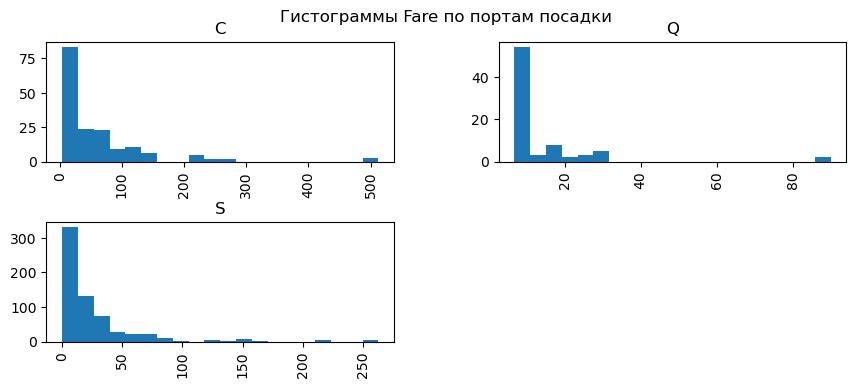

In [22]:
# И строим гистограммы для поля Fare в отношении портов посадки
df['Fare'].hist(by=df['Embarked'], bins=20, figsize=(10, 4))
plt.suptitle("Гистограммы Fare по портам посадки")
plt.show()

In [28]:
# Можно увидеть наглядно, что самые дорогие билеты в городе S, самые дешевые в городе Q, город C между ними.

### 7

Do all the features provide useful information? Why? Get rid of unnecessary columns. Justify your choice.

In [23]:
df_clean = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# Удаляем PassengerId тк это просто поле id
# Остальные поля Name, Ticket, Cabin дропаем тк содержат слишком специфичную информацию
print("Оставшиеся столбцы после удаления ненужных:")
print(df_clean.columns)

Оставшиеся столбцы после удаления ненужных:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


### 8

Are there any gaps in the data? If yes, in which columns? How many gaps are there in each of them?

In [27]:
print("Количество пропущенных значений по столбцам:\n", df.isnull().sum())
# Пропущенные значения в столбцах (Age, Cabin, Embarked) с пропусками (177, 687, 2) соответственно

Количество пропущенных значений по столбцам:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 9

Think about how to fill in the gaps in each column and perform it. Check that there are no gaps left anywhere.

In [39]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('null')

print("Пропущенные значения после заполнения:\n", df.isnull().sum())

Пропущенные значения после заполнения:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### 10

Calculate how strongly the price of a ticket and the age of passengers correlate with each other. Also check the presence of this connection visually (building a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) will help you with this). What conclusions can be drawn?

Коэффициент корреляции между Fare и Age: 0.09668842218036487


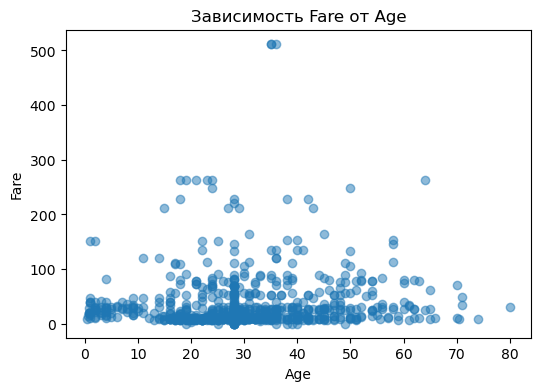

In [51]:
print("Коэффициент корреляции между Fare и Age:", df['Fare'].corr(df['Age']))
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title("Зависимость Fare от Age")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# Можно прекрасно увдеть, что корреляция отсутствует, те fare и age не зависят друг от друга и изменение одного не приведет к изменению другого

### 11

Is it true that passengers with more expensive tickets survived more often? Is there a dependence of survival on class? Give reasons for your answer!

Средний Fare по группам:
 Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64
Вероятность выживания по классам:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


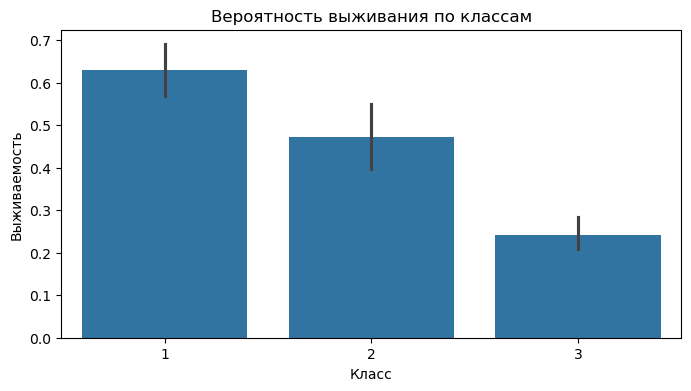

In [52]:
# Сравниваем среднюю стоимость билета для выживших и невыживших
print("Средний Fare по группам:\n", df.groupby('Survived')['Fare'].mean())

# Анализ выживаемости в зависимости от класса
print("Вероятность выживания по классам:\n", df.groupby('Pclass')['Survived'].mean())

# Визуализация зависимости выживаемости от класса
plt.figure(figsize=(8, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Вероятность выживания по классам")
plt.xlabel("Класс")
plt.ylabel("Выживаемость")
plt.show()

# По стате и графику наглядно видно, что клас прямо влияет на выживаемость
# Чем выше клас тем выше выживаемость, даже вспоминая историю с титаником, то помнится что сначала на лодки сажали первый класс, а там по убывающей. Также от пола пассажира выживаемость тоже сказывается.

### 12

Creating new features (feature engineering) is one of the main means of improving the quality of machine learning algorithms at the data processing stage, and is also a great way to improve the quality of your conclusions from your analysis in general! Add a column to the table that will show how many relatives sailed with the passenger on the ship, including himself. How can such feature be useful?

In [57]:
df['Relatives'] = df['SibSp'] + df['Parch'] + 1
df['Relatives'].head()
# Данный параметр можно использовать при определении выживаемости пассажира – как помощь родственников влияет на выживаемость

0    2
1    2
2    1
3    2
4    1
Name: Relatives, dtype: int64

### 13

Now come up with your own feature that can be useful for analysis (carries some information), and add it to the table. Be sure to give reasons why your feature is useful.

In [59]:
df['IsMinor'] = np.where(df['Age'] < 18, 1, 0)
df['IsMinor'].head()
# Доп параметр, который может помочь понять выживаемость в отношении возраста пассажира

0    0
1    0
2    0
3    0
4    0
Name: IsMinor, dtype: int64

### 14

Come up with some interesting task to analyze the proposed data and solve it.

Creativity is appreciated in this task and may earn you 1-2 bonus points!

*Clue. For example, what was the most popular surname on the ship? (It’s better not to use this example, so come up with something of your own)*

Выживаемость по возрастным группам и полу:
  AgeGroup     Sex  Survived
0    Child  female  0.593750
1    Child    male  0.555556
2     Teen  female  0.826087
3     Teen    male  0.136364
4    Adult  female  0.767327
5    Adult    male  0.179625
6   Senior  female  1.000000
7   Senior    male  0.136364


/var/folders/kk/2t7q31r53hz60_94_r8w7sh00000gn/T/ipykernel_14709/1218679681.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_sex = df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().reset_index()


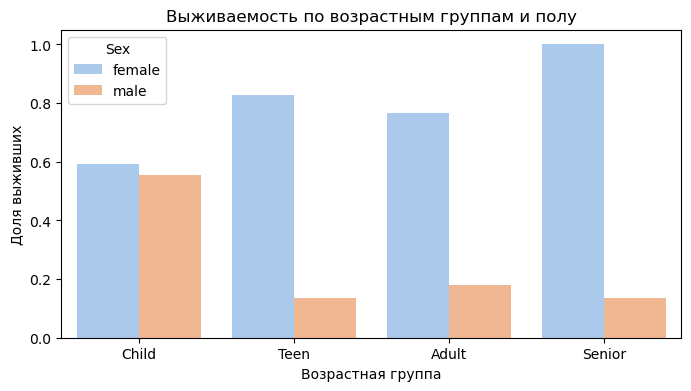

In [75]:
# Создадим новую колонку AgeGroup на основе столбца Age
# Определим подгруппы для возрастных групп: дети 0–12, подростки 12–18, взрослые 18–60 и пожилые 60+
df = pd.read_csv("./train.csv") # Допом тк колонки ранее потер без копии
bins = [0, 12, 18, 60, 120]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Группируем данные по возрастной группе и полу, затем рассчитываем среднюю выживаемость для каждой группы
survival_by_age_sex = df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().reset_index()
print("Выживаемость по возрастным группам и полу:")
print(survival_by_age_sex)

plt.figure(figsize=(8, 4))
sns.barplot(x='AgeGroup', y='Survived', hue='Sex', data=survival_by_age_sex, palette='pastel')
plt.title("Выживаемость по возрастным группам и полу")
plt.xlabel("Возрастная группа")
plt.ylabel("Доля выживших")
plt.show()

### 15

Construct histograms of the distribution of **numerical** features. Is there any difference between them? How could this be bad from a data analytics perspective and from a machine learning perspective? Normalize the numerical features and see how the situation has changed. What conclusions can be drawn from this?

The depth of answering the theoretical questions in this assignment is appreciated and may earn you 1-2 bonus points!

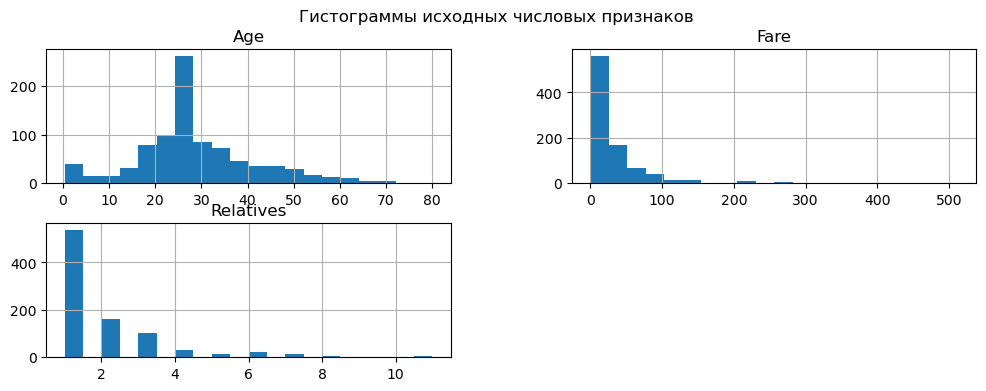

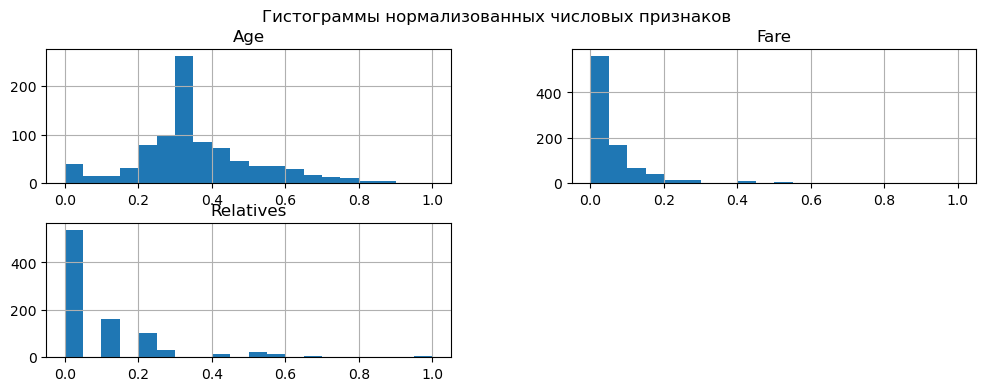

In [71]:
numerical_features = ['Age', 'Fare', 'Relatives']
df[numerical_features].hist(bins=20, figsize=(12, 4))
plt.suptitle("Гистограммы исходных числовых признаков")
plt.show()

# Нормализуем признаки
df_normalized = df.copy()
for col in numerical_features:
    df_normalized[col] = (df_normalized[col] - df_normalized[col].min()) / (df_normalized[col].max() - df_normalized[col].min())

# И делаем гистограмму
df_normalized[numerical_features].hist(bins=20, figsize=(12, 4))
plt.suptitle("Гистограммы нормализованных числовых признаков")
plt.show()

# На сколько знаю, то нормализовнные данные помогают большинству мл алгоритмов тк они приводят данные к одному масштабу

### 16

Are there any categorical features in the data that take string values ​​rather than numbers? If so, this could be a serious problem for many algorithms, so encode the categorical features so that any algorithm can be applied to the data.

In [70]:
df_encoded = pd.read_csv("./train.csv") # Надо было копии делать, а то колонки стер ранее, а уже прям времени нет....
df_encoded = pd.get_dummies(df_encoded, columns=['Sex', 'Embarked'], drop_first=True)
print("Первые строки данных после кодирования категориальных признаков:")
df_encoded.head()

Первые строки данных после кодирования категориальных признаков:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


## Bonus part for machine learning (up to 5 bonus points)

### 17

Solve the binary classification problem of predicting the survival of a passenger (the target variable $y$ is the Survived column; the task is for each object (passenger), from its feature space (remaining columns) to predict whether he will survive or not based on available data).

In order to do this, separate the target variable ''Survived'' from the training sample and train some machine learning algorithm for classification on them (for beginners, we can recommend reading about perhaps the simplest and most understandable algorithm for initial development - kNN) . Using the algorithm you have chosen and trained, then build a prediction on the test set, having previously processed it in the same way as the training one.

In [ ]:
# Честно времени и сил на это нету, но я оставлю ссылки на свои ранее сделанные работы на kaggle для titanic и spaceship titanic датасетов. Надеюсь это считается.
# https://www.kaggle.com/code/nicklitwinow/titanic-max-accuracy-0-77033
# https://www.kaggle.com/code/nicklitwinow/spaceship-titanic-max-accuracy-0-80102

Based on the data you worked with, a competition was created on Kaggle, aimed at aspiring Data Scientists: https://www.kaggle.com/c/titanic. You are invited to participate in it - if you have reached this point, then there is absolutely nothing left for this. Register on Kaggle and accept the competition rules. If you already have an answer for the test sample that you want to send for evaluation and get into the leaderboard, you need to add it to the .csv file and format it as necessary. To do this, in the data tab (https://www.kaggle.com/c/titanic/data) there is an example of what this file should look like (“gender_submission.csv”). You can download and study it. For your convenience, below is the code that allows you to generate a file for sending.

In [ ]:
subm = pd.read_csv('gender_submission.csv')
subm['Survived'] = prediction_test

In [ ]:
subm.to_csv('test_subm_proba.csv', index=False)

Submit the file for measurement using the “Submit Predictions” button. The metric used in competitions is accuracy. What was the result? Try to improve it! For example, select the form of features that would be most useful for prediction (feature selection) or create new features (feature generation).

### Important!

You can find a lot of useful information on this additional task in https://www.kaggle.com/c/titanic/kernels and https://www.kaggle.com/c/titanic/discussion!

But do not plagiarize the code from there